# Vusialization in IPython Notebook using seaborn

1. Visualizing the distribution of a dataset
=========================================

When dealing with a set of data, often the first thing you'll want to do
is get a sense for how the variables are distributed. This chapter of
the tutorial will give a brief introduction to some of the tools in
seborn for examining univariate and bivariate distributions. 

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
np.random.seed(sum(map(ord, "distributions")))

Plotting univariate distributions
---------------------------------

The most convenient way to take a quick look at a univariate
distribution in seaborn is the distplot function. By default, this will
draw a [histogram](https://en.wikipedia.org/wiki/Histogram) and fit a
[kernel density
estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation)
(KDE).

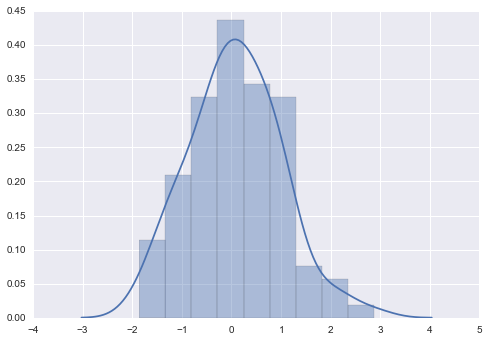

In [5]:
x = np.random.normal(size=100)
sns.distplot(x);

### Histograms

Histograms are likely familiar, and a `hist` function already exists in
matplotlib. A histogram represents the distribution of data by forming
bins along the range of the data and then drawing bars to show the
number of observations that fall in each bin.

To illustrate this, let's remove the density curve and add a rug plot,
which draws a small vertical tick at each observation. You can make the
rug plot itself with the rugplot function, but it is also available in
distplot:

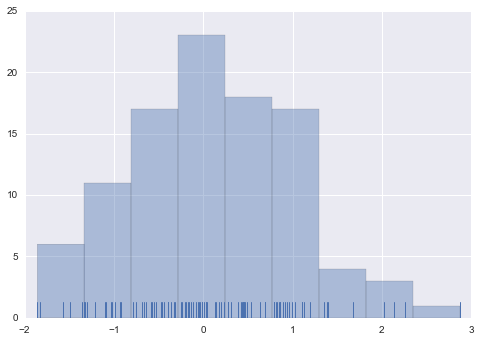

In [6]:
sns.distplot(x, kde=False, rug=True);

![image](distributions_files/distributions_10_0.png)

When drawing histograms, the main choice you have is the number of bins
to use and where to place them. distplot uses a simple rule to make a
good guess for what the right number is by default, but trying more or
fewer bins might reveal other features in the data:

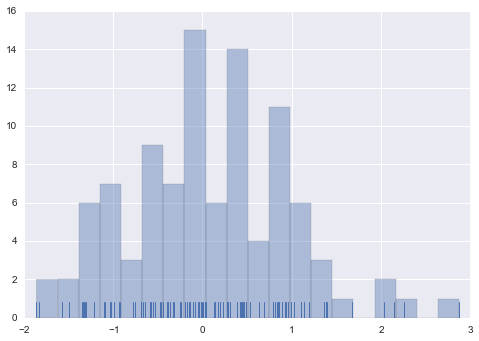

In [7]:
sns.distplot(x, bins=20, kde=False, rug=True);

![image](distributions_files/distributions_12_0.png)

### Kernel density estimaton

The kernel density estimate may be less familiar, but it can be a useful
tool for plotting the shape of a distribution. Like the histogram, the
KDE plots encodes the density of observations on one axis with height
along the other axis:

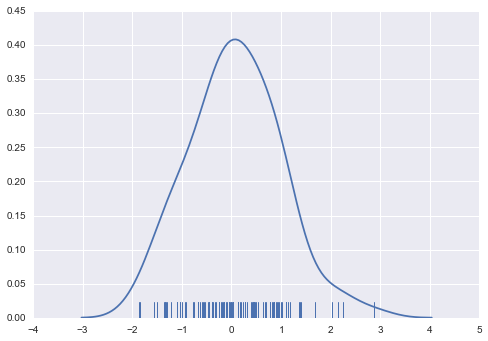

In [8]:
sns.distplot(x, hist=False, rug=True);

![image](distributions_files/distributions_14_0.png)

Drawing a KDE is more computationally involved than drawing a histogram.
What happens is that each observation is first replaced with a normal
(Gaussian) curve centered at that value:

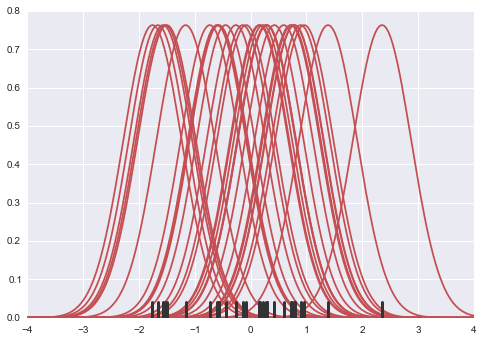

In [9]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

![image](distributions_files/distributions_16_0.png)

Next, these curves are summed to compute the value of the density at
each point in the support grid. The resulting curve is then normalized
so that the area under it is equal to 1:

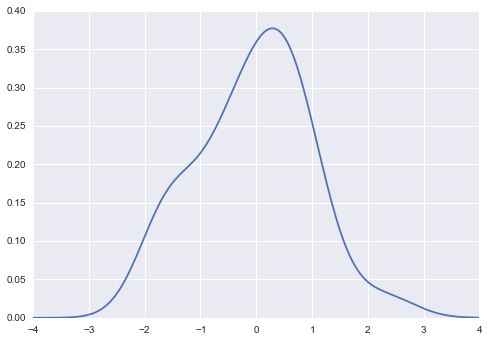

In [10]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

![image](distributions_files/distributions_18_0.png)

We can see that if we use the kdeplot function in seaborn, we get the
same curve. This function is used by distplot, but it provides a more
direct interface with easier access to other options when you just want
the density estimate:

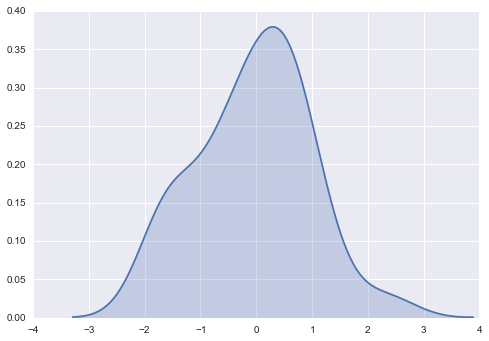

In [11]:
sns.kdeplot(x, shade=True);

![image](distributions_files/distributions_20_0.png)

The bandwidth (`bw`) parameter of the KDE controls how tightly the
estimation is fit to the data, much like the bin size in a histogram. It
corresponds to the width of the kernels we plotted above. The default
behavior tries to guess a good value using a common reference rule, but
it may be helpful to try larger or smaller values:

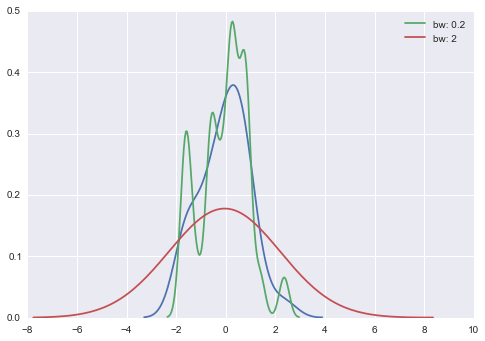

In [12]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

![image](distributions_files/distributions_22_0.png)

As you can see above, the nature of the Gaussian KDE process means that
estimation extends past the largest and smallest values in the dataset.
It's possible to control how far past the extreme values the curve is
drawn with the `cut` parameter; however, this only influences how the
curve is drawn and not how it is fit:

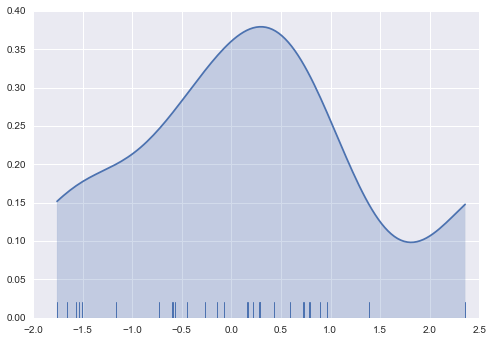

In [13]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

![image](distributions_files/distributions_24_0.png)

### Fitting parametric distributions

You can also use distplot to fit a parametric distribution to a dataset
and visually evaluate how closely it corresponds to the observed data:

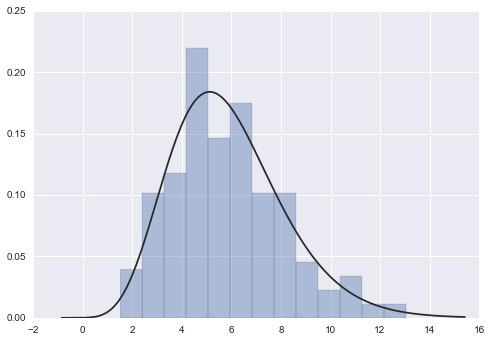

In [14]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

![image](distributions_files/distributions_26_0.png)

Plotting bivariate distributions
--------------------------------

It can also be useful to visualize a bivariate distribution of two
variables. The easiest way to do this in seaborn is to just the
jointplot function, which creates a multi-panel figure that shows both
the bivariate (or joint) relationship between two variables along with
the univariate (or marginal) distribution of each on separate axes.

In [15]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

### Scatterplots

The most familiar way to visualize a bivariate distribution is a
scatterplot, where each observation is shown with point at the *x* and
*y* values. This is analgous to a rug plot on two dimensions. You can
draw a scatterplot with the matplotlib `plt.scatter` function, and it is
also the default kind of plot shown by the jointplot function:

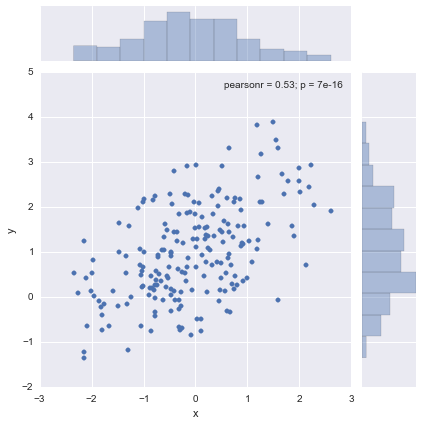

In [16]:
sns.jointplot(x="x", y="y", data=df);

![image](distributions_files/distributions_30_0.png)

### Hexbin plots

The bivariate analogue of a histogram is known as a "hexbin" plot,
because it shows the counts of observations that fall within hexagonal
bins. This plot works best with relatively large datasets. It's
availible through the matplotlib `plt.hexbin` function and as a style in
jointplot. It looks best with a white background:

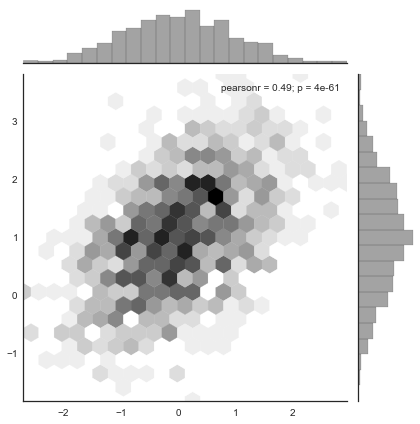

In [17]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

![image](distributions_files/distributions_32_0.png)

### Kernel density estimation

It is also posible to use the kernel density estimation procedure
described above to visualize a bivariate distribution. In seaborn, this
kind of plot is shown with a contour plot and is available as a style in
jointplot:

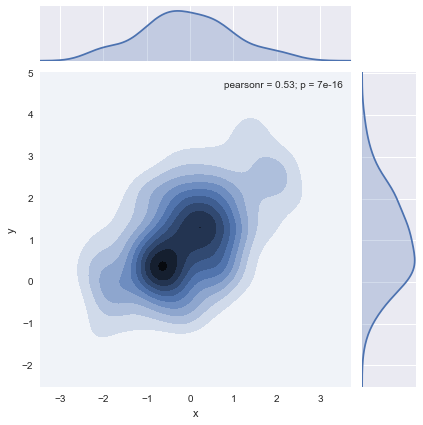

In [18]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

![image](distributions_files/distributions_34_0.png)

You can also draw a two-dimensional kernel density plot with the kdeplot
function. This allows you to draw this kind of plot onto a specific (and
possibly already existing) matplotlib axes, whereas the jointplot
function manages its own figure:

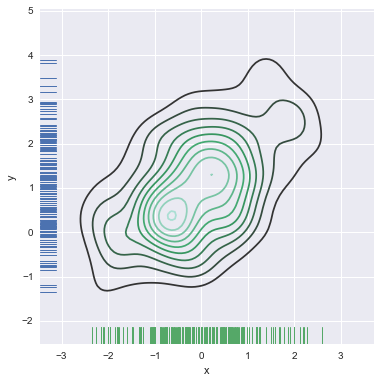

In [19]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

![image](distributions_files/distributions_36_0.png)

If you wish to show the bivariate density more continuously, you can
simply increase the number of contour levels:

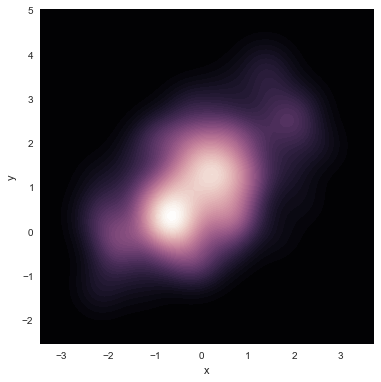

In [20]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

![image](distributions_files/distributions_38_0.png)

The jointplot function uses a JointGrid to manage the figure. For more
flexibility, you may want to draw your figure by using JointGrid
directly. jointplot returns the JointGrid object after plotting, which
you can use to add more layers or to tweak other aspects of the
visualization:

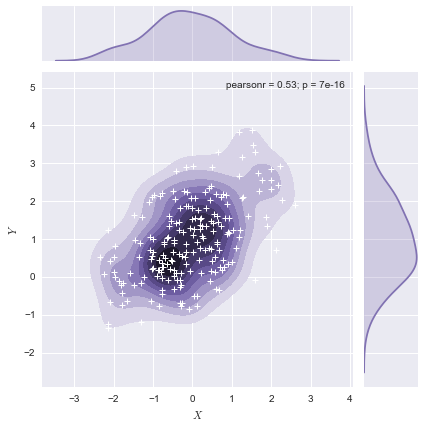

In [21]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

![image](distributions_files/distributions_40_0.png)

Visualizing pairwise relationships in a dataset
-----------------------------------------------

To plot multiple pairwise bivariate distributions in a dataset, you can
use the pairplot function. This creates a matrix of axes and shows the
relationship for each pair of columns in a DataFrame. by default, it
also draws the univariate distribution of each variable on the diagonal
Axes:

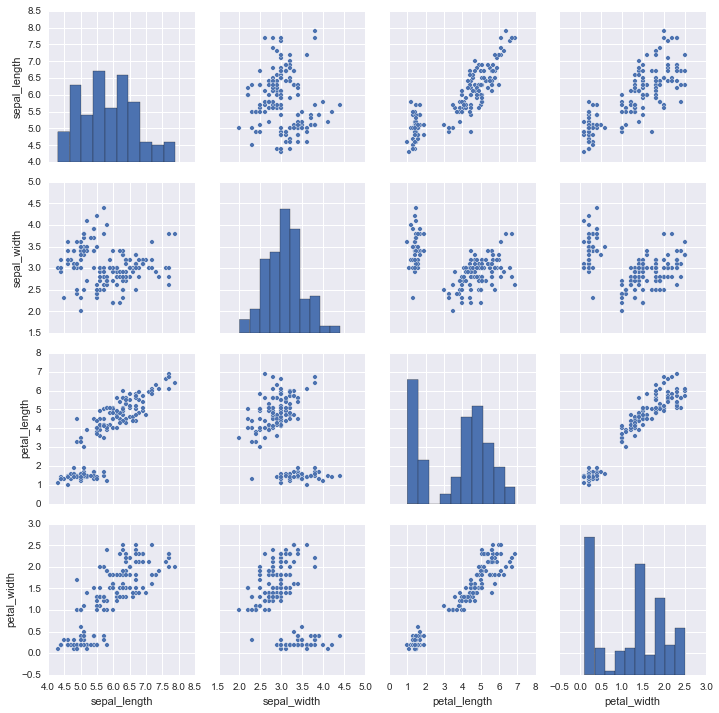

In [22]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

![image](distributions_files/distributions_42_0.png)

Much like the relationship between jointplot and JointGrid, the pairplot
function is built on top of a PairGrid object, which can be used
directly for more flexibility:

C:\Users\Rush\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


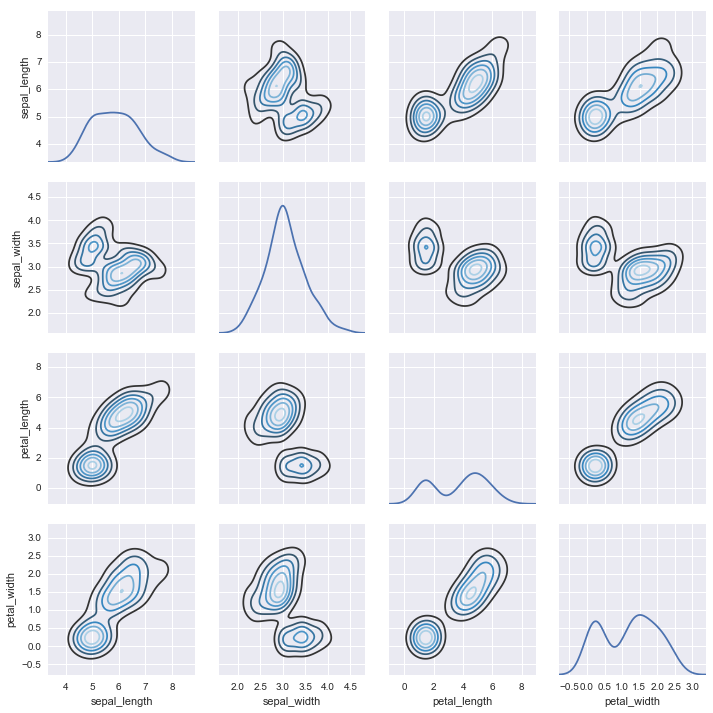

In [23]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

![image](distributions_files/distributions_44_1.png)

2. Visualizing linear relationships
================================

Many datasets contain multiple quantitative variables, and the goal of
an analysis is often to relate those variables to each other. We
previously discussed &lt;distribution\_tutorial&gt; functions that can
accomplish this by showing the joint distribution of two variables. It
can be very helpful, though, to use statistical models to estimate a
simple relationship between two noisy sets of observations. The
functions discussed in this chapter will do so through the common
framework of linear regression.

In the spirit of Tukey, the regression plots in seaborn are primarily
intended to add a visual guide that helps to emphasize patterns in a
dataset during exploratory data analyses. That is to say that seaborn is
not itself a package for statistical analysis. To obtain quantitative
measures related to the fit of regression models, you should use
[statsmodels](http://statsmodels.sourceforge.net/). The goal of seaborn,
however, is to make exploring a dataset through visualization quick and
easy, as doing so is just as (if not more) important than exploring a
dataset through tables of statistics.

In [24]:
%matplotlib inline

In [25]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [26]:
import seaborn as sns
sns.set(color_codes=True)

In [27]:
np.random.seed(sum(map(ord, "regression")))

In [28]:
tips = sns.load_dataset("tips")

Functions to draw linear regression models
------------------------------------------

Two main functions in seaborn are used to visualize a linear
relationship as determined through regression. These functions, regplot
and lmplot are closely related, and share much of their core
functionality. It is important to understand the ways they differ,
however, so that you can quickly choose the correct tool for particular
job.

In the simplest invocation, both functions draw a scatterplot of two
variables, `x` and `y`, and then fit the regression model `y ~ x` and
plot the resulting regression line and a 95% confidence interval for
that regression:

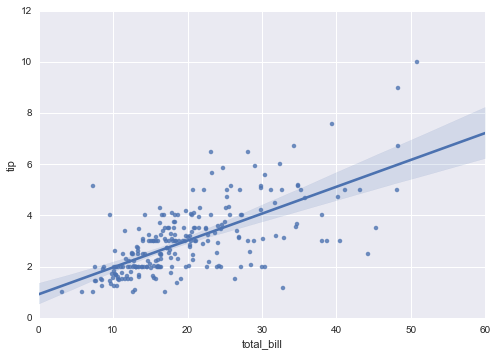

In [29]:
sns.regplot(x="total_bill", y="tip", data=tips);

![image](regression_files/regression_9_0.png)

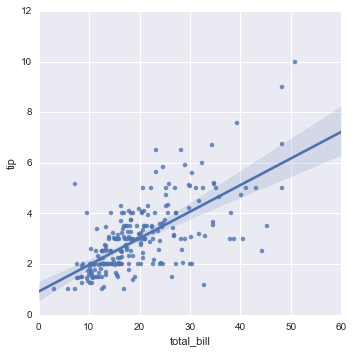

In [30]:
sns.lmplot(x="total_bill", y="tip", data=tips);

![image](regression_files/regression_10_0.png)

You should note that the resulting plots are identical, except that the
figure shapes are different. We will explain why this is shortly. For
now, the other main difference to know about is that regplot accepts the
`x` and `y` variables in a variety of formats including simple numpy
arrays, pandas `Series` objects, or as references to variables in a
pandas `DataFrame` object passed to `data`. In contrast, lmplot has
`data` as a required parameter and the `x` and `y` variables must be
specified as strings. This data format is called "long-form" or
["tidy"](http://vita.had.co.nz/papers/tidy-data.pdf) data. Other than
this input flexibility, regplot possesses a subset of lmplot's features,
so we will demonstrate them using the latter.

It's possible to fit a linear regression when one of the variables takes
discrete values, however, the simple scatterplot produced by this kind
of dataset is often not optimal:

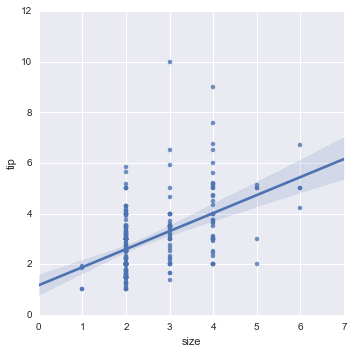

In [31]:
sns.lmplot(x="size", y="tip", data=tips);

![image](regression_files/regression_12_0.png)

One option is to add some random noise ("jitter") to the discrete values
to make the distribution of those values more clear. Note that jitter is
applied only to the scatterplot data and does not influence the
regression line fit itself:

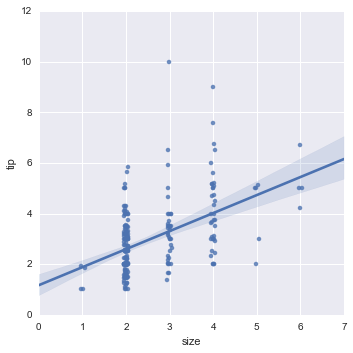

In [32]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

![image](regression_files/regression_14_0.png)

A second option is to collapse over the observations in each discrete
bin to plot an estimate of central tendency along with a confidence
interval:

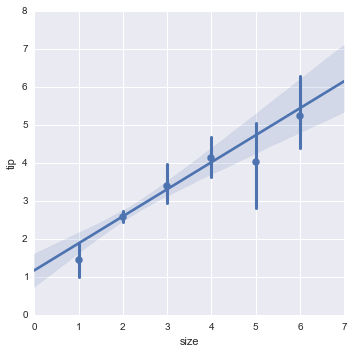

In [33]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

![image](regression_files/regression_16_0.png)

Fitting different kinds of models
---------------------------------

The simple linear regression model used above is very simple to fit,
however, it is not appropriate for some kinds of datasets. The
[Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
dataset shows a few examples where simple linear regression provides an
identical estimate of a relationship where simple visual inspection
clearly shows differences. For example, in the first case, the linear
regression is a good model:

In [34]:
anscombe = sns.load_dataset("anscombe")

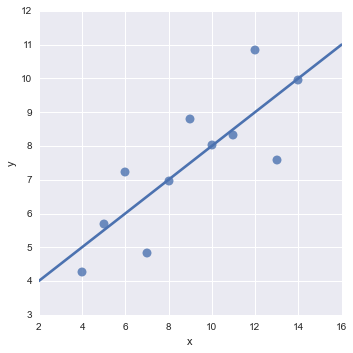

In [35]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

![image](regression_files/regression_19_0.png)

The linear relationship in the second dataset is the same, but the plot
clearly shows that this is not a good model:

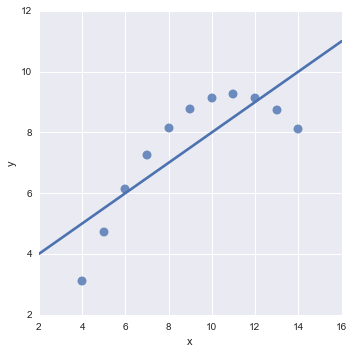

In [36]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

![image](regression_files/regression_21_0.png)

In the presence of these kind of higher-order relationships, lmplot and
regplot can fit a polynomial regression model to explore simple kinds of
nonlinear trends in the dataset:

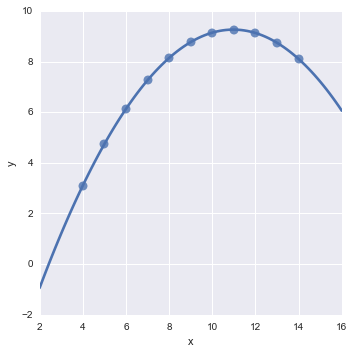

In [37]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

![image](regression_files/regression_23_0.png)

A different problem is posed by "outlier" observations that deviate for
some reason other than the main relationship under study:

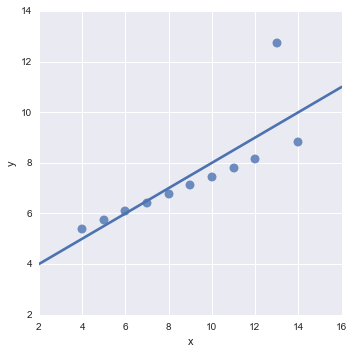

In [38]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

![image](regression_files/regression_25_0.png)

In the presence of outliers, it can be useful to fit a robust
regression, which uses a different loss function to downweight
relatively large residuals:

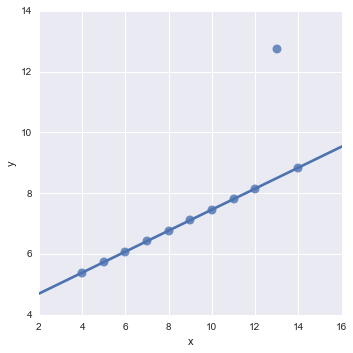

In [39]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

![image](regression_files/regression_27_0.png)

When the `y` variable is binary, simple linear regression also "works"
but provides implausible predictions:

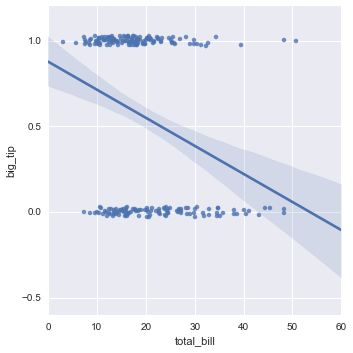

In [40]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

![image](regression_files/regression_29_0.png)

The solution in this case is to fit a logistic regression, such that the
regression line shows the estimated probability of `y = 1` for a given
value of `x`:

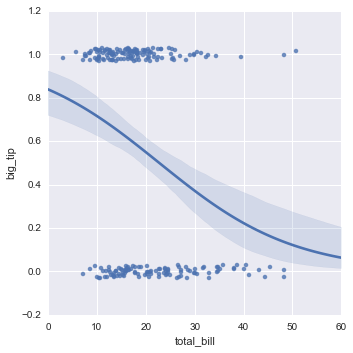

In [41]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

![image](regression_files/regression_31_0.png)

Note that the logistic regression estimate is considerably more
computationally intensive (this is true of robust regression as well)
than simple regression, and as the confidence interval around the
regression line is computed using a bootstrap procedure, you may wish to
turn this off for faster iteration (using `ci=False`).

An altogether different approach is to fit a nonparametric regression
using a [lowess
smoother](https://en.wikipedia.org/wiki/Local_regression). This approach
has the fewest assumptions, although it is computationally intensive and
so currently confidence intervals are not computed at all:

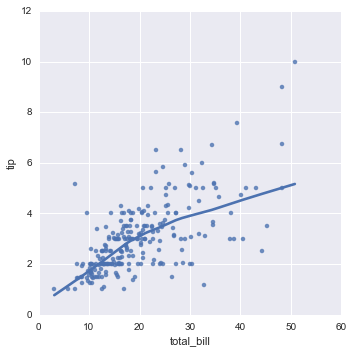

In [42]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

![image](regression_files/regression_33_0.png)

The residplot function can be a useful tool for checking whether the
simple regression model is appropriate for a dataset. It fits and
removes a simple linear regression and then plots the residual values
for each observation. Ideally, these values should be randomly scattered
around `y = 0`:

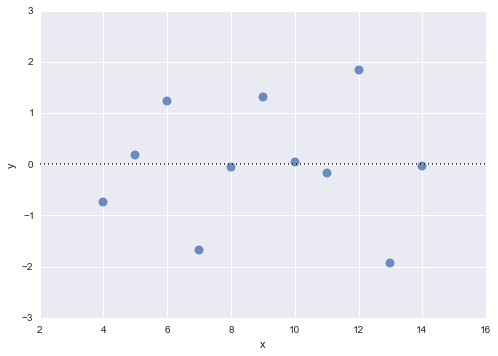

In [43]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

![image](regression_files/regression_35_0.png)

If there is structure in the residuals, it suggests that simple linear
regression is not appropriate:

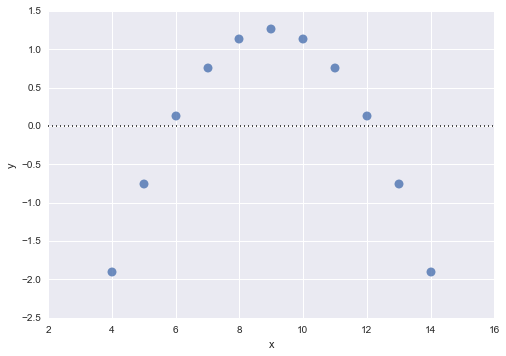

In [44]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

![image](regression_files/regression_37_0.png)

Conditioning on other variables
-------------------------------

The plots above show many ways to explore the relationship between a
pair of variables. Often, however, a more interesting question is "how
does the relationship between these two variables change as a function
of a third variable?" This is where the difference between regplot and
lmplot appears. While regplot always shows a single relationsihp, lmplot
combines regplot with FacetGrid to provide an easy interface to show a
linear regression on "faceted" plots that allow you to explore
interactions with up to three additional categorical variables.

The best way to separate out a relationship is to plot both levels on
the same axes and to use color to distinguish them:

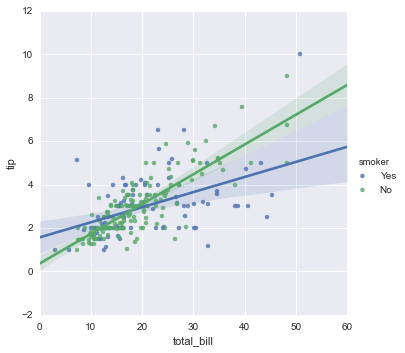

In [45]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

![image](regression_files/regression_39_0.png)

In addition to color, it's possible to use different scatterplot markers
to make plots the reproduce to black and white better. You also have
full control over the colors used:

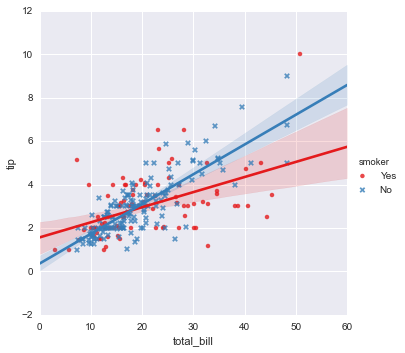

In [46]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

![image](regression_files/regression_41_0.png)

To add another variable, you can draw multiple "facets" which each level
of the variable appearing in the rows or columns of the grid:

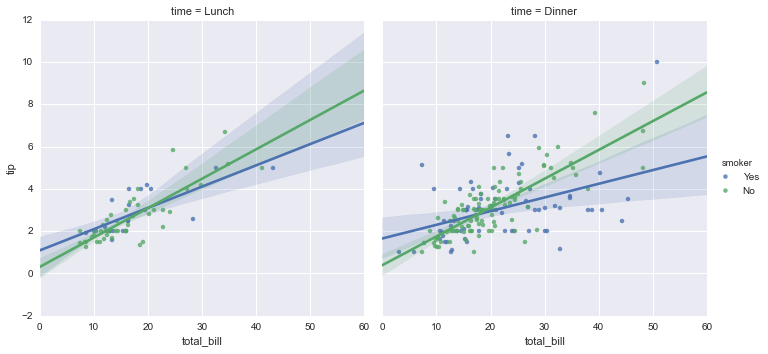

In [47]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

![image](regression_files/regression_43_0.png)

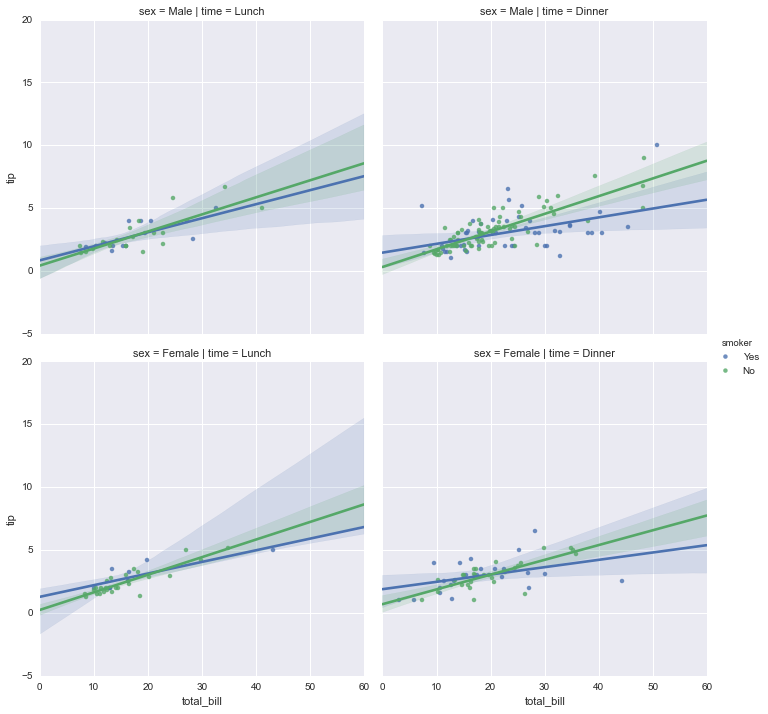

In [48]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

![image](regression_files/regression_44_0.png)

Controlling the size and shape of the plot
------------------------------------------

Before we noted that the default plots made by regplot and lmplot look
the same but on axes that have a different size and shape. This is
because func:regplot is an "axes-level" function draws onto a specific
axes. This means that you can make mutli-panel figures yourself and
control exactly where the the regression plot goes. If no axes is
provided, it simply uses the "currently active" axes, which is why the
default plot has the same size and shape as most other matplotlib
functions. To control the size, you need to create a figure object
yourself.

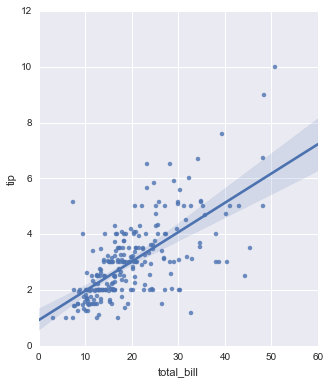

In [49]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

![image](regression_files/regression_46_0.png)

In contrast, the size and shape of the lmplot figure is controlled
through the FacetGrid interface using the `size` and `aspect`
parameters, which apply to each *facet* in the plot, not to the overall
figure itself:

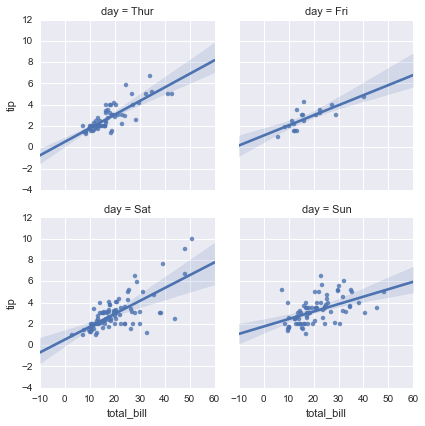

In [50]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=3);

![image](regression_files/regression_48_0.png)

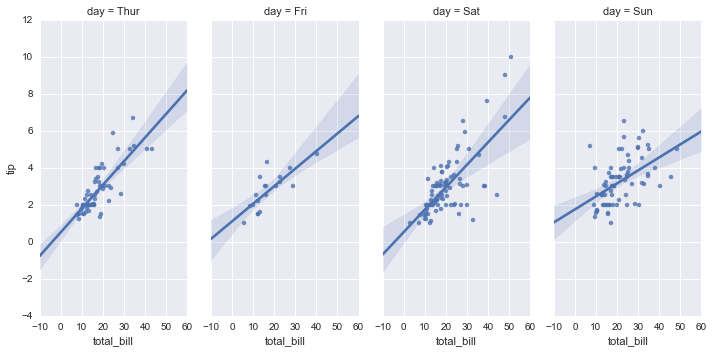

In [51]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

![image](regression_files/regression_49_0.png)

Plotting a regression in other contexts
---------------------------------------

A few other seaborn functions use regplot in the context of a larger,
more complex plot. The first is the jointplot function that we
introduced in the distributions tutorial &lt;distribution\_tutorial&gt;.
In addition to the plot styles previously discussed, jointplot can use
regplot to show the linear regression fit on the joint axes by passing
`kind="reg"`:

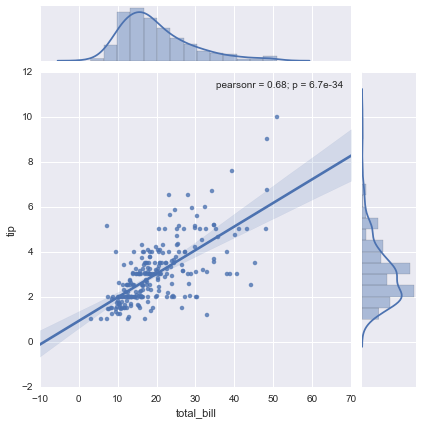

In [52]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

![image](regression_files/regression_51_0.png)

Using the pairplot function with `kind="reg"` combines regplot and
PairGrid to show the linear relationship between variables in a dataset.
Take care to note how this is different from lmplot. In the figure
below, the two axes don't show the same relationship conditioned on two
levels of a third variable; rather, PairGrid is used to show multiple
relationships between different pairings of the variables in a dataset:

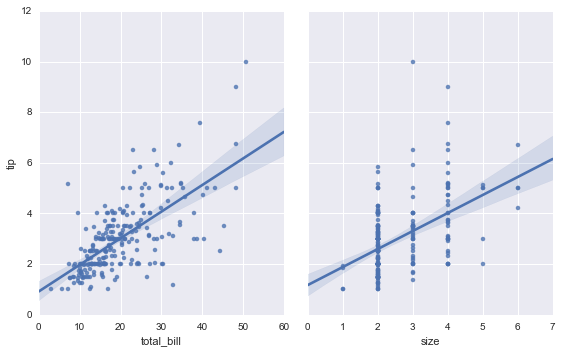

In [53]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=5, aspect=.8, kind="reg");

![image](regression_files/regression_53_0.png)

Like lmplot, but unlike jointplot, conditioning on an additional
categorical variable is built into pairplot using the `hue` parameter:

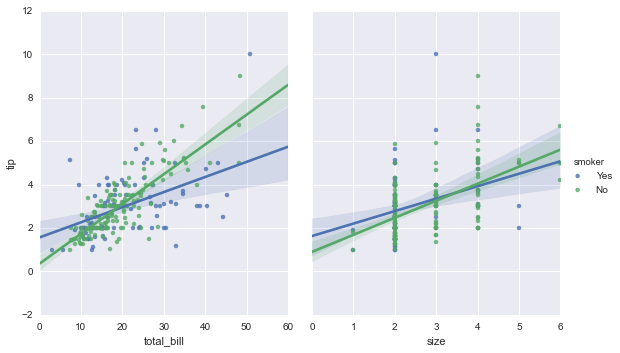

In [54]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=5, aspect=.8, kind="reg");

![image](regression_files/regression_55_0.png)

3. Plotting with categorical data
==============================

We previously learned how to use
scatterplots and regression model fits to visualize the relationship
between two variables and how it changes across levels of additional
categorical variables. However, what if one of the main variables you
are interested in is categorical? In this case, the scatterplot and
regression model approach won't work. There are several options,
however, for visualizing such a relationship, which we will discuss in
this tutorial.

It's useful to divide seaborn's categorical plots into two groups: those
that show the full distribution of observations within each level of the
categorical variable, and those that apply a statistical estimation to
show a measure of central tendency and confidence interval. The former
includes the functions stripplot, boxplot, and violinplot, while the
latter includes the functions barplot, countplot, and pointplot. These
functions all share a basic API for how they accept data, although each
has specific parameters that control the particulars of the
visualization that is applied to that data.

Much like the relationship between regplot and lmplot, in seaborn there
are both relatively low-level and relatively high-level approaches for
making categorical plots. The functions named above are all low-level in
that they plot onto a specific matplotlib axes. There is also the
higher-level factorplot, which combines these functions with a FacetGrid
to apply a categorical plot across a grid of figure panels.

It is easiest and best to invoke these functions with a DataFrame that
is in ["tidy"](http://vita.had.co.nz/papers/tidy-data.pdf) format,
although the lower-level functions also accept wide-form DataFrames or
simple vectors of observations. See below for examples.

In [55]:
%matplotlib inline

In [56]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [57]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [58]:
np.random.seed(sum(map(ord, "categorical")))

In [59]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

Distributions of observations within categories
-----------------------------------------------

The first set of functions shows the full distribution of the
quantitative variable within each level of the categorical variable(s).
These generalize some of the approaches we discussed in the
chapter &lt;distribution\_tutorial&gt; to the case where we want to
quickly compare across several distributions.

### Categorical scatterplots

A simple way to show the distribution of some quantitative variable
across the levels of a categorical variable uses stripplot, which
generalizes a scatterplot to the case where one of the variables is
categorical:

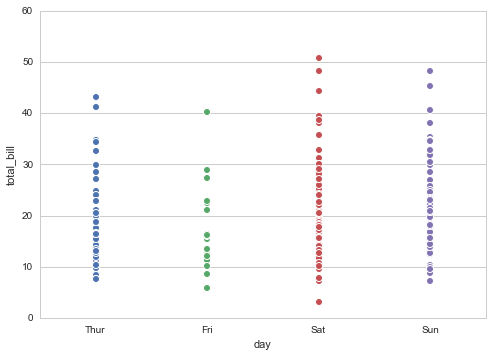

In [60]:
sns.stripplot(x="day", y="total_bill", data=tips);

![image](categorical_files/categorical_9_0.png)

It's also possible to add a nested categorical variable with the `hue`
paramater. Above the color and position on the categorical axis are
redundent, but now each provides information about one of the two
variables:

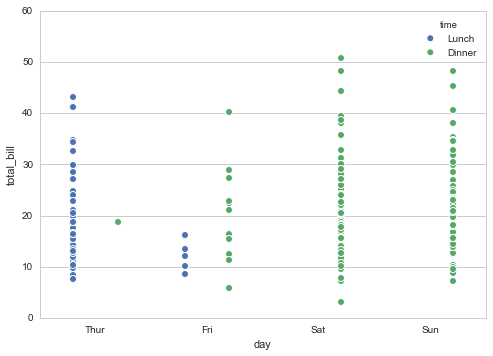

In [61]:
sns.stripplot(x="day", y="total_bill", hue="time", data=tips);

![image](categorical_files/categorical_11_0.png)

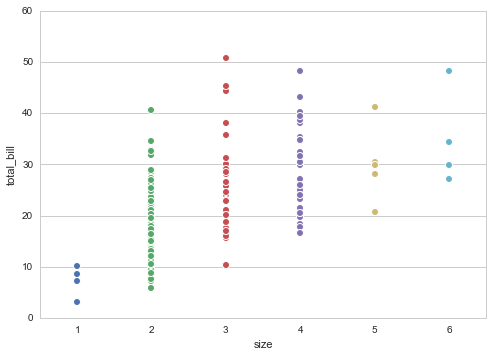

In [62]:
sns.stripplot(x="size", y="total_bill", data=tips.sort("size"));

![image](categorical_files/categorical_13_0.png)

With these plots, it's often helpful to put the categorical variable on
the vertical axis (this is particularly useful when the category names
are relatively long or there are many categories):

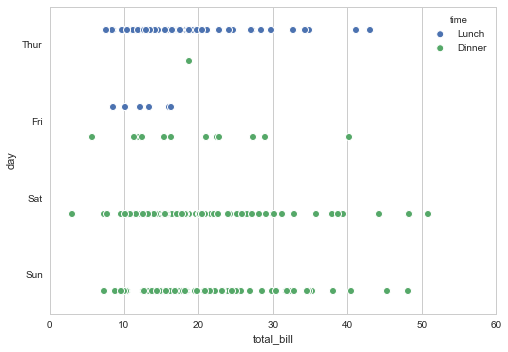

In [63]:
sns.stripplot(x="total_bill", y="day", hue="time", data=tips);

![image](categorical_files/categorical_15_0.png)

### Boxplots

At a certain point, the categorical scatterplot approach becomes limited
in the information it can provide about the distribution of values
within each category. There are several ways to summarize this
information in ways that facilitate easy comparisons across the category
levels.

The first is the familiar boxplot. This kind of plot shows the three
quartile values of the distribution along with extreme values. The
"whiskers" extend to points that lie within 1.5 IQRs of the lower and
upper quartile, and then observations that fall outside this range are
displayed independently. Importantly, this means that each value in the
boxplot corresponds to an actual observation in the data:

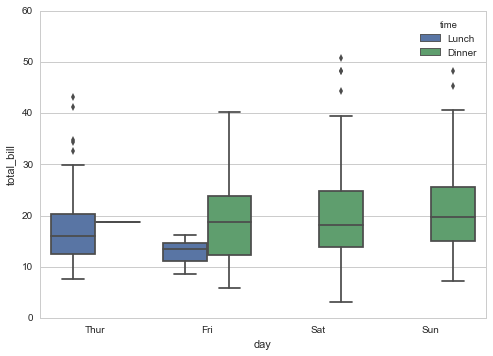

In [64]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

![image](categorical_files/categorical_17_0.png)

### Violinplots

A different approach is a violinplot, which combines a boxplot with the
kernel density estimation procedure described in the
distributions tutorial &lt;distribution\_tutorial&gt;\_:

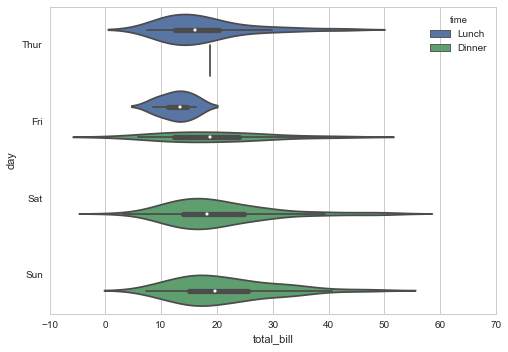

In [65]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

![image](categorical_files/categorical_19_0.png)

This approach uses the kernel density estimate to provide a better
description of the distribution of values. Additionally, the quartile
and whikser values from the boxplot are shown inside the violin. Because
the violinplot uses a KDE, there are some other parameters that may need
tweaking, adding some complexity relative to the straightforward
boxplot:

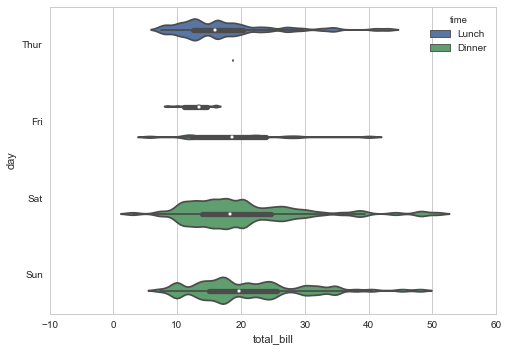

In [66]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips,
               bw=.1, scale="count", scale_hue=False);

![image](categorical_files/categorical_21_0.png)

It's also possible to "split" the violins when the hue parameter has
only two levels, which can allow for a more efficient use of space:

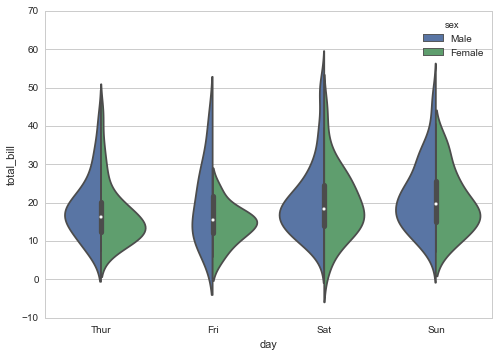

In [67]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

![image](categorical_files/categorical_23_0.png)

Finally, there are several options for the plot that is drawn on the
interior of the violins, including ways to show each individual
observation instead of the summary boxplot values:

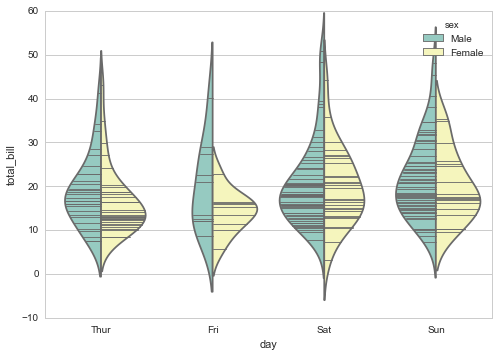

In [68]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
               split=True, inner="stick", palette="Set3");

![image](categorical_files/categorical_25_0.png)

It can also be useful to combine stripplot with violinplot or boxplot to
show each observation along with a summary of the distribution:

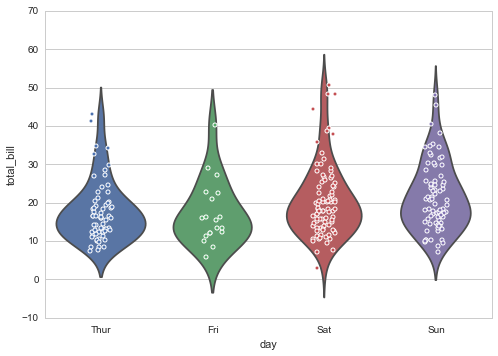

In [69]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, size=4);

![image](categorical_files/categorical_27_0.png)

Statistical estimation within categories
----------------------------------------

Often, rather than showing the distribution within each category, you
might want to show the central tendency of the values. Seaborn has two
main ways to show this information, but importantly, the basic API for
these functions is identical to that for the ones discussed above.

### Bar plots

A familiar style of plot that accomplishes this goal is a bar plot. In
seaborn, the barplot function operates on a full dataset and shows an
arbitrary estimate, using the mean by default. When there are multiple
observations in each category, it also uses bootstrapping to compute a
confidence interval around the estimate and plots that using error bars:

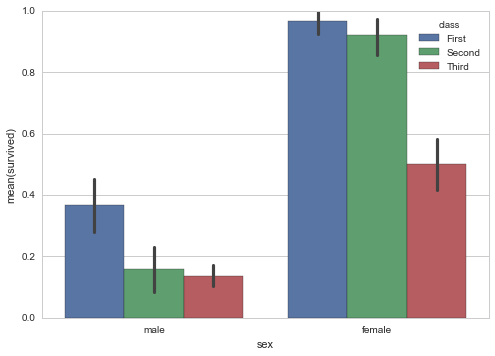

In [70]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

![image](categorical_files/categorical_29_0.png)

A special case for the bar plot is when you want to show the number of
observations in each category rather than computing a statistic for a
second variable. This is similar to a histogram over a categorical,
rather than quantitative, variable. In seaborn, it's easy to do so with
the countplot function:

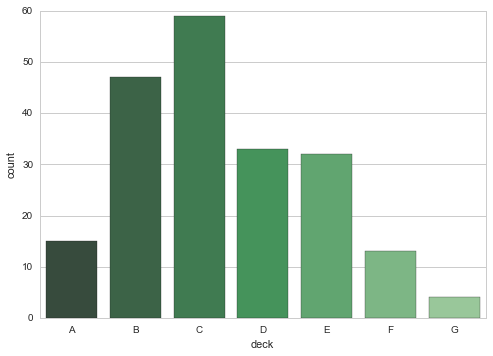

In [71]:
sns.countplot(x="deck", data=titanic, palette="Greens_d");

![image](categorical_files/categorical_31_0.png)

Both barplot and countplot can be invoked with all of the options
discussed above, along with others that are demonstrated in the detailed
documentation for each function:

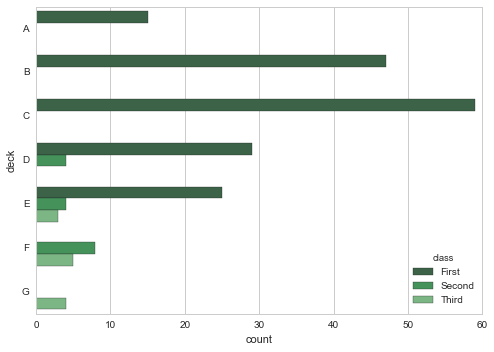

In [72]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d");

![image](categorical_files/categorical_33_0.png)

### Point plots

An alternative style for visualizing the same information is offered by
the pointplot function. This function also encodes the value of the
estimate with height on the other axis, but rather than show a full bar
it just plots the point estimate and confidence interval. Additionally,
pointplot connects points from the same `hue` category. This makes it
easy to see how the main relationship is changing as a function of a
second variable, because your eyes are quite good at picking up on
differences of slopes:

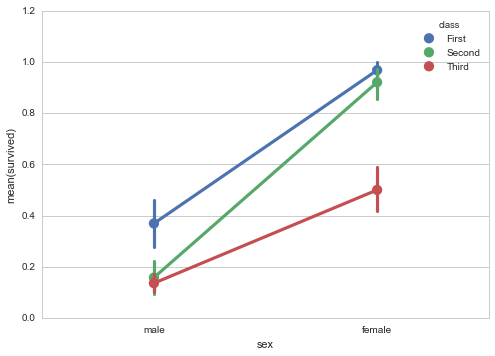

In [73]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

![image](categorical_files/categorical_35_0.png)

To make figures that reproduce well in black and white, it can be good
to use different markers and line styles for the levels of the `hue`
category:

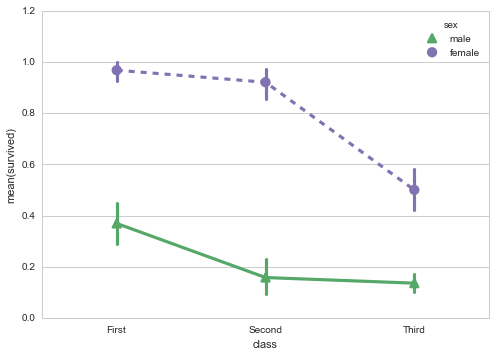

In [74]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

![image](categorical_files/categorical_37_0.png)

Drawing multi-panel categorical plots
-------------------------------------

As we mentioned above, there are two ways to draw categorical plots in
seaborn. Similar to the duality in the regression plots, you can either
use the functions introduced above, or the higher-level function
factorplot, which combines these functions with a FacetGrid to add the
ability to examine additional categories through the larger structure of
the figure.

While the main options for each plot kind are available either way, the
lower-level functions have a bit more flexibility in the kind of inputs
they can take. For instance, you can just pass a `DataFrame` to the
`data` parameter, and the distribution or central tendency of each
*column* in the dataframe will be shown:

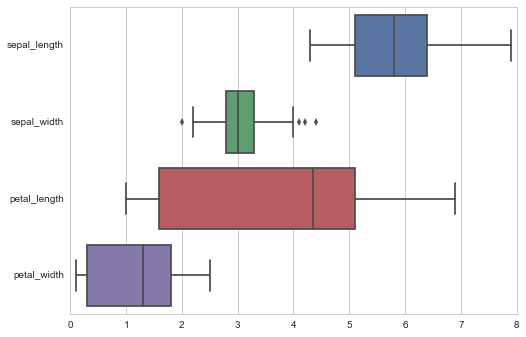

In [75]:
sns.boxplot(data=iris, orient="h");

![image](categorical_files/categorical_39_0.png)

Additionally, these functions accept vectors of Pandas or numpy objects
rather than variables in a `DataFrame`:

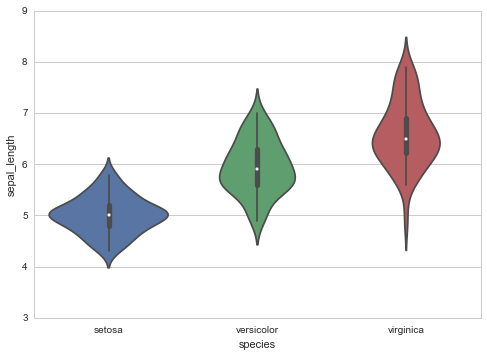

In [76]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

![image](categorical_files/categorical_41_0.png)

To control the size and shape of plots made by the functions discussed
above, you must set up the figure yourself using matplotlib commands. Of
course, this also means that the plots can happily coexist in a
multi-panel figure with other kinds of plots:

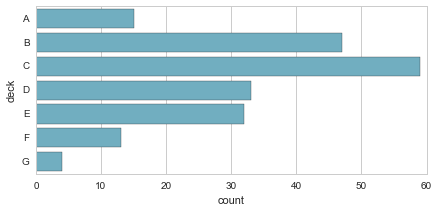

In [77]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

![image](categorical_files/categorical_43_0.png)

The factorplot function is a higher-level wrapper on these plots that
produces a matplotlib figure managed through a FacetGrid:

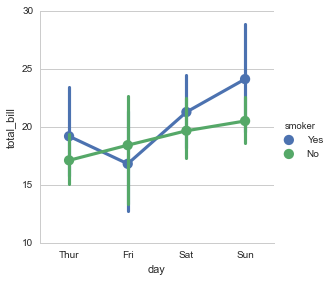

In [78]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips);

![image](categorical_files/categorical_45_0.png)

By default it uses pairplot, but the `kind` parameter lets you chose any
of the kinds of plots discussed above:

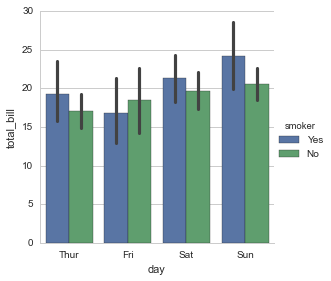

In [79]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar");

![image](categorical_files/categorical_47_0.png)

The key advantage of factorplot is that it's easy to add faceting by
additional variables in the `DataFrame`, such as along the columns:

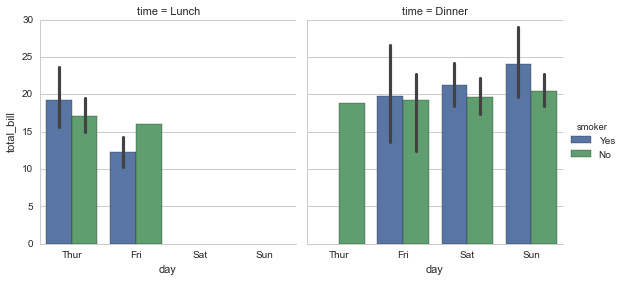

In [80]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="bar");

![image](categorical_files/categorical_49_0.png)

Any kind of plot can be drawn. Because of the way FacetGrid works, to
change the size and shape of the figure you need to specify the `size`
and `aspect` arguments, which apply to a single facet:

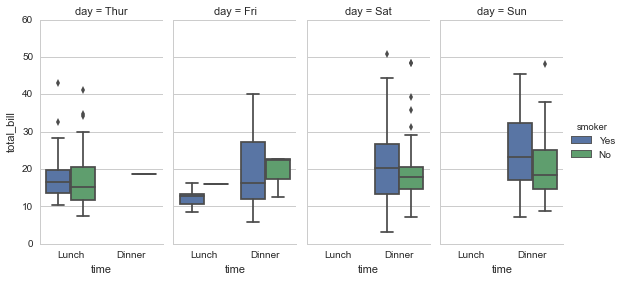

In [81]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5);

![image](categorical_files/categorical_51_0.png)

Because of the generalized API of the categorical plots, they should be
easy to apply to other more complex contexts. For example, they are
easily combined with a PairGrid to show categorical relationships across
several different variables:

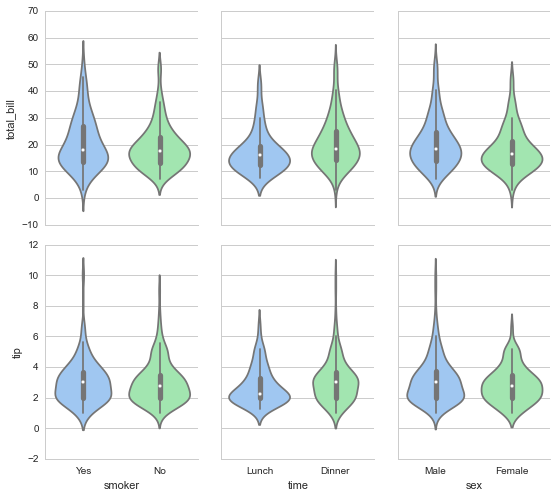

In [82]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");